In [1]:
#Predict NYC Rent prices (data from Kaggle)

import pandas as pd
df = pd.read_csv("rent.csv")
print(df.shape) # print rows, columns
df.head(2)       # dump first 2 rows


(49352, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,['https://photos.renthop.com/2/7211212_1ed4542...,3000,792 Metropolitan Avenue,medium
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"['Doorman', 'Elevator', 'Fitness Center', 'Cat...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,['https://photos.renthop.com/2/7150865_be3306c...,5465,808 Columbus Avenue,low


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import pandas as pd # Import the library and give a short alias: pd
# #run prep-rent
# rent = pd.read_csv("rent-ideal.csv")

In [4]:
# rent.head()

In [5]:
# rent.T

In [6]:
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]

In [7]:
df_num.head()

,bathrooms,bedrooms,longitude,latitude,price
0,1.5,3,-73.9425,40.7145,3000
1,1.0,2,-73.9667,40.7947,5465
2,1.0,1,-74.0018,40.7388,2850
3,1.0,1,-73.9677,40.7539,3275
4,1.0,4,-73.9493,40.8241,3350


In [8]:
df_num.isnull().any()

bathrooms    False
bedrooms     False
longitude    False
latitude     False
price        False
dtype: bool

In [9]:
#Training and evaluating an initial model
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1)

In [11]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
r2 = rf.score(X_train, y_train)

In [13]:
r2 #81% of variance is captured by model

0.8296216838961417

In [14]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   #set to true to get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score -0.0773


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

X, y = df_num.drop('price', axis=1), df_num['price']

errors = []
print(f"Validation MAE trials:", end='') #average absolute error in dollars
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average validation MAE ${noisy_avg_mae:.0f}")

Validation MAE trials: $389 $572 $429 $833 $415 $851 $865
Average validation MAE $622


In [16]:
df_num.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,-73.955716,40.741545,3.830174e+03
std,0.50142,1.115018,1.177912,0.638535,2.206687e+04
min,0.00000,0.000000,-118.271000,0.000000,4.300000e+01
25%,1.00000,1.000000,-73.991700,40.728300,2.500000e+03
50%,1.00000,1.000000,-73.977900,40.751800,3.150000e+03
75%,1.00000,2.000000,-73.954800,40.774300,4.100000e+03
max,10.00000,8.000000,0.000000,44.883500,4.490000e+06


In [17]:
df_num.price.sort_values(ascending=False).head(10)

19558    4490000
9590     1150000
30689    1070000
29665    1070000
10581     135000
25538     111111
45674     100000
29082      90000
7336       85000
47995      80000
Name: price, dtype: int64

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64
1    15752
2    14623
0     9475
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98860f77b8>,
      dtype=object)

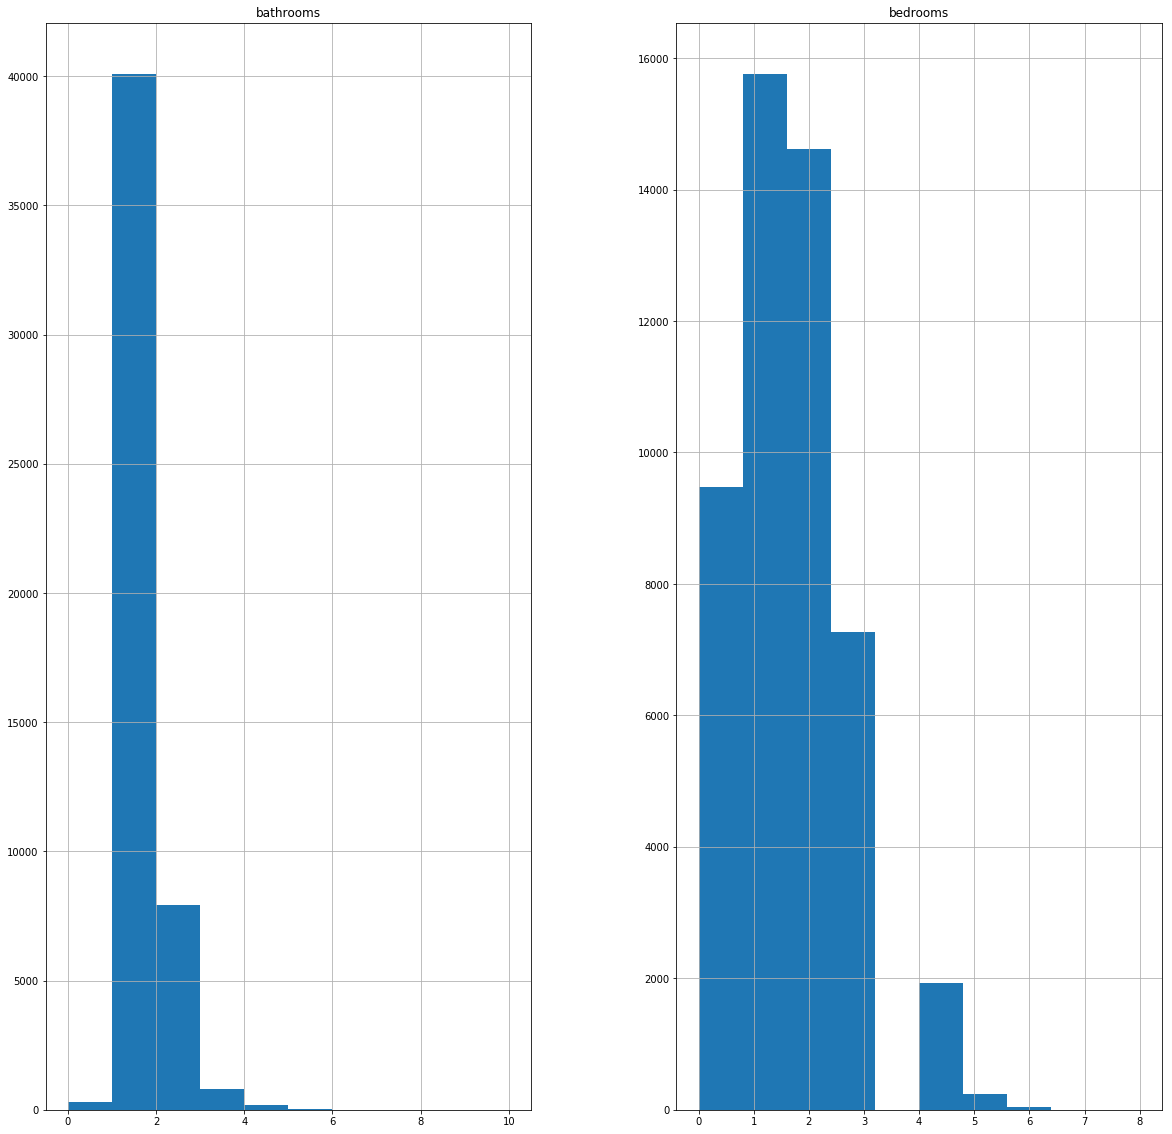

In [18]:
print(df_num.bathrooms.value_counts())
print(df_num.bedrooms.value_counts())
df_num[['bathrooms', 'bedrooms']].hist(figsize = (20,20))


In [19]:
print(len(df[(df.longitude==0.0) & (df.latitude==0.0)]))
#count how many entries with 0,0

12


In [20]:
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
           (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
39939,1,1.0,west 54 st & 8 ave,2300
21711,1,1.0,300 West 55th Street,2400
15352,1,1.0,300 West 55th Street,3350
48274,1,1.0,300 West 55th Street,3400
29665,1,1.0,333 West 57th Street,1070000
30689,1,1.0,333 West 57th Street,1070000


In [21]:
# filter all records (training/testing)
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]
# only want reasonably priced apartments as outliers won't help model
# prediction goals


Text(0, 0.5, 'Num Apts at that price')

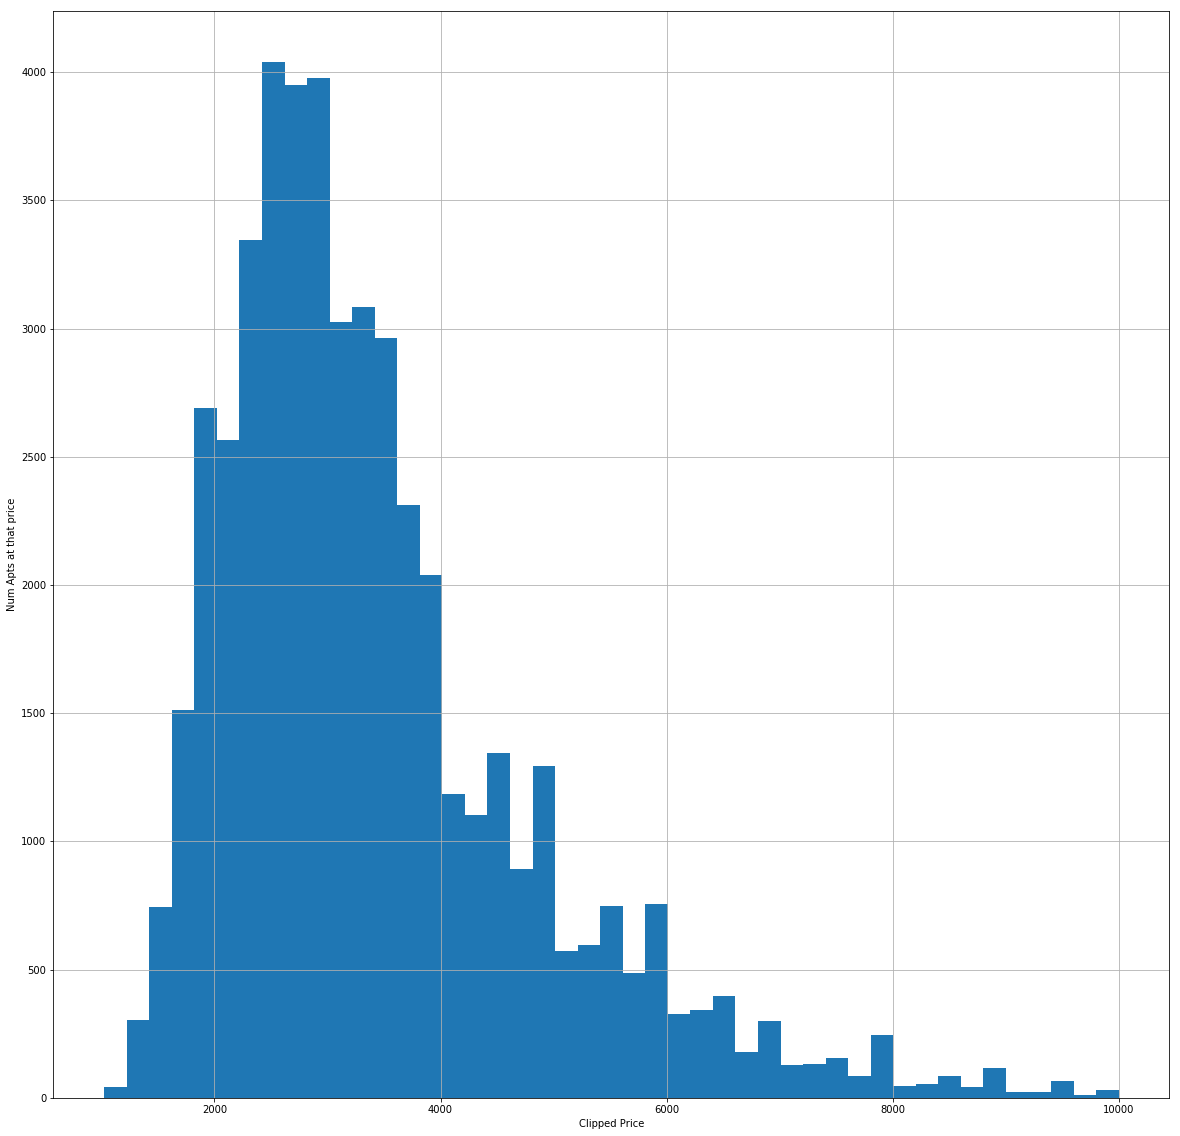

In [22]:
ax = df_clean['price'].hist(bins = 45, figsize = (20,20))
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')

Text(0, 0.5, 'Num Apts at that price')

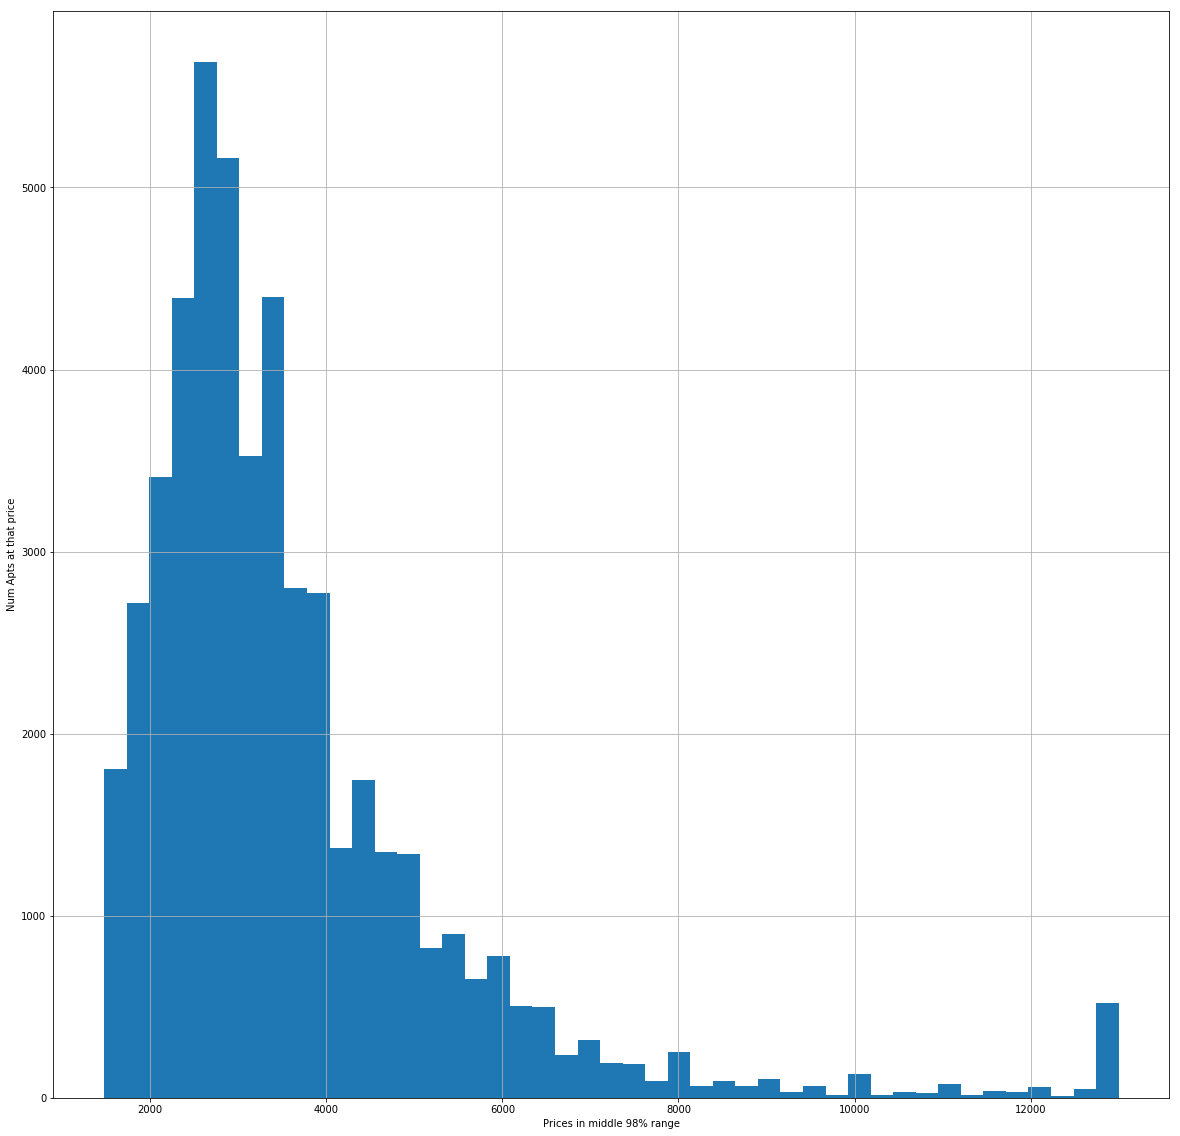

In [23]:
#clip out bottom and top 1%
upper, lower = np.percentile(df.price, [1,99])
clipped = np.clip(df.price, upper, lower)
ax = clipped.hist(bins=45, figsize=(20,20))
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num Apts at that price')

In [24]:
df_missing = df_clean[(df_clean.longitude==0) & (df_clean.latitude==0)]
print(len(df_missing))
# delete missing entries from db
df_clean = df_clean[(df_clean.longitude!=0) & (df_clean.latitude!=0)]

11


In [25]:
# exclude values outside of NYC
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]
# find bounds on gps-coordinates.org
# New York City has latitude, longitude 40.55, -74.1 on the lower left
# 40.94, -73.67 on the upper right

In [26]:
X, y = df_clean.drop('price', axis=1), df_clean['price']
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,        # parallelize
                           oob_score=True)   # get error estimate
rf.fit(X, y)
clean_oob_r2 = rf.oob_score_
print(f"Validation OOB score {clean_oob_r2:.4f}")

Validation OOB score 0.8679


In [27]:
errors = []
print(f"Validation clean MAE trials:", end='') #average absolute error in dollars
for i in range(7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted = rf.predict(X_test)
    e = mean_absolute_error(y_test, y_predicted)
    print(f" ${e:.0f}", end='')
    errors.append(e)
print()
noisy_avg_mae = np.mean(errors)
print(f"Average clean validation MAE ${noisy_avg_mae:.0f}")

Validation clean MAE trials: $303 $290 $301 $291 $300 $294 $296
Average clean validation MAE $297


In [28]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
lm = Lasso(alpha=0.5) # create linear model
lm.fit(X_train, y_train)
print(f"LM Training score {lm.score(X_train, y_train):.4f}")
print(f"LM Validation score {lm.score(X_test, y_test):.4f}")

LM Training score 0.5782
LM Validation score 0.5666


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 2000)
gbr.fit(X_train, y_train)
print(f"GB Training score {gbr.score(X_train, y_train):.4f}")
print(f"GB Validation score {gbr.score(X_test, y_test):.4f}")

GB Training score 0.8404
GB Validation score 0.8096


In [30]:
# random forest model looks to perform favorably over other models
# so with the current exclusions as a baseline model:

df = pd.read_csv("rent.csv", parse_dates=['created'])
df_clean = df[(df.price>1_000) & (df.price<10_000)]
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]
df = df_clean

In [31]:
numfeatures = ['bathrooms', 'bedrooms', 'longitude', 'latitude']
X, y = df[numfeatures], df['price']
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y)
oob_baseline = rf.oob_score_
print(oob_baseline)

0.8677607506108305


In [32]:
from rfpimp import *
print(f"{rfnnodes(rf):,d} tree nodes and {np.median(rfmaxdepths(rf))} median tree height")

2,433,374 tree nodes and 35.0 median tree height


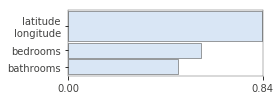

In [33]:
def showimp(rf, X, y):
    features = list(X.columns)
    features.remove('latitude')
    features.remove('longitude')
    features += [['latitude','longitude']]

    I = importances(rf, X, y, features=features)
    plot_importances(I)
    
showimp(rf, X, y)

In [34]:
print(df['interest_level'].value_counts())

low       33270
medium    11203
high       3827
Name: interest_level, dtype: int64


In [35]:
df['interest_level'] = df['interest_level'].map({'low':1,'medium':2,'high':3})
print(df['interest_level'].value_counts())

1    33270
2    11203
3     3827
Name: interest_level, dtype: int64


In [38]:
def test(X, y):
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    rf.fit(X, y)
    oob = rf.oob_score_
    n = rfnnodes(rf)
    h = np.median(rfmaxdepths(rf))
    print(f"OOB R^2 {oob:.5f} using {n:,d} tree nodes with {h} median tree height")
    return rf, oob

X, y = df[['interest_level']+numfeatures], df['price']
rf, oob = test(X, y)

OOB R^2 0.87018 using 3,023,560 tree nodes with 35.0 median tree height


In [39]:
#couple points better than our baseline

In [40]:
print(len(df['manager_id'].unique()), \
      len(df['building_id'].unique()), \
      len(df['display_address'].unique()))

3409 7417 8692


In [41]:
# label encode, computed automatically by Pandas
df['display_address_cat'] = df['display_address'].astype('category').cat.as_ordered()
df['display_address_cat'] = df['display_address_cat'].cat.codes + 1 #convert nan from -1 to 0

In [42]:
X, y = df[['display_address_cat']+numfeatures], df['price']
rf, oob = test(X, y)
# same as baseline, does not improve

OOB R^2 0.86549 using 3,122,874 tree nodes with 37.0 median tree height


In [43]:
# let's try frequency encoding
df['manager_id'].value_counts().head(5)

e6472c7237327dd3903b3d6f6a94515a    2509
6e5c10246156ae5bdcd9b487ca99d96a     695
8f5a9c893f6d602f4953fcc0b8e6e9b4     404
62b685cc0d876c3a1a51d63a0d6a8082     396
cb87dadbca78fad02b388dc9e8f25a5b     370
Name: manager_id, dtype: int64

In [44]:
managers_count = df['manager_id'].value_counts()
df['mgr_apt_count'] = df['manager_id'].map(managers_count)

In [45]:
X, y = df[['display_address_cat','mgr_apt_count']+numfeatures], df['price']
rf, oob = test(X, y)
# model complexity also increased w/o improvement. avoid these features

OOB R^2 0.86421 using 4,569,450 tree nodes with 41.0 median tree height


In [46]:
df['description'] = df['description'].fillna('')
df['description'] = df['description'].str.lower() # normalize to lower case
df['features'] = df['features'].fillna('') # fill missing w/blanks
df['features'] = df['features'].str.lower() # normalize to lower case


In [47]:
# has apartment been renovated?
df['renov'] = df['description'].str.contains("renov")

for feature in ['doorman', 'parking', 'garage', 'laundry', 
          'Elevator', 'fitness center', 'dishwasher']:
    df[feature] = df['features'].str.contains(feature) #return t/f for new columns
df[['doorman', 'parking', 'garage', 'laundry']].head(5)

,doorman,parking,garage,laundry
0,False,False,False,False
1,True,False,False,False
2,False,False,False,True
3,False,False,False,False
4,False,False,False,False


In [48]:
# count num of words in descriptions
df["num_desc_words"] = df["description"].apply(lambda x: len(x.split()))
# sum up number of features
df["num_features"] = df["features"].apply(lambda x: len(x.split(",")))
# sum up number of photos uploaded
df["num_photos"] = df["photos"].apply(lambda x: len(x.split(",")))



In [49]:
# test out new features on model
textfeatures = [
    'num_photos', 'num_desc_words', 'num_features',
    'doorman', 'parking', 'garage', 'laundry', 
    'Elevator', 'fitness center', 'dishwasher',
    'renov'
]
X, y = df[textfeatures+numfeatures], df['price']
rf, oob = test(X, y)

OOB R^2 0.86253 using 4,773,100 tree nodes with 44.0 median tree height


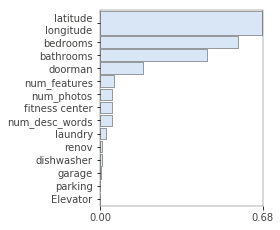

In [50]:
# model does not improve, complexity increases
showimp(rf, X, y)

In [51]:
# try to find predictive power in feature ratios

df["beds_to_baths"] = df["bedrooms"]/(df["bathrooms"]+1) # avoid div by 0
X, y = df[['beds_to_baths']+numfeatures], df['price']
rf, oob = test(X, y)

# doesn't improve model

OOB R^2 0.86771 using 2,433,088 tree nodes with 35.0 median tree height


In [52]:
# ratio of bedrooms to price?

df["beds_per_price"] = df["bedrooms"] / df["price"]
X, y = df[['beds_per_price']+numfeatures], df['price']
rf, oob = test(X, y)

# r2 too high, data leakage occuring

OOB R^2 0.98636 using 1,315,992 tree nodes with 30.5 median tree height


In [53]:
# try finding average price per building

df.groupby('building_id').mean()[['price']].head(5)

,price
building_id,
0,3195.9321
00005cb939f9986300d987652c933e15,3399.0000
00024d77a43f0606f926e2312513845c,2000.0000
000ae4b7db298401cdae2b0ba1ea8146,2400.0000
0012f1955391bca600ec301035b97b65,3700.0000


In [54]:
#use category encoders to compute building price mean from a subset of the data
from category_encoders.target_encoder import TargetEncoder
df = df.reset_index() # not sure why TargetEncoder needs this but it does
targetfeatures = ['building_id']
encoder = TargetEncoder(cols=targetfeatures)
encoder.fit(df, df['price'])
df_encoded = encoder.transform(df, df['price'])

X, y = df_encoded[targetfeatures+numfeatures], df['price']
rf, oob = test(X, y)

# pretty good score but might be overfit

OOB R^2 0.87219 using 2,746,598 tree nodes with 39.0 median tree height


In [60]:
df_encoded.building_id.head()

0    2758.647370
1    5732.619043
2    3330.172414
3    3577.989899
4    3195.932100
Name: building_id, dtype: float64

In [61]:
# find training score vs test score to verify
df_train, df_test = train_test_split(df, test_size=0.20)

# TargetEncoder needs the resets, not sure why
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_train = df_train[numfeatures]
y_train = df_train['price']
X_test = df_test[numfeatures]
y_test = df_test['price']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
s_validation = rf.score(X_test, y_test)
print(f"{s_validation:4f} score {rfnnodes(rf):,d} tree nodes and {np.median(rfmaxdepths(rf))} median tree height")


0.856310 score 2,127,060 tree nodes and 35.0 median tree height


In [58]:
enc = TargetEncoder(cols=targetfeatures)
enc.fit(df_train, df_train['price'])
df_train_encoded = enc.transform(df_train, df_train['price'])
df_test_encoded = enc.transform(df_test)

X_train = df_train_encoded[targetfeatures+numfeatures]
y_train = df_train_encoded['price']
X_test = df_test_encoded[targetfeatures+numfeatures]
y_test = df_test_encoded['price']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
s_tenc_validation = rf.score(X_test, y_test)
print(f"{s_tenc_validation:.4f} score {rfnnodes(rf):,d} tree nodes and {np.median(rfmaxdepths(rf))} median tree height")

# looks like adding in building id price will cause the model to overfit

0.8540 score 2,373,358 tree nodes and 38.0 median tree height


In [62]:
# adding another feature by top 10 desirable neighborhoods in NYC
hoods = {
    "hells" : [40.7622, -73.9924],
    "astoria" : [40.7796684, -73.9215888],
    "Evillage" : [40.723163774, -73.984829394],
    "Wvillage" : [40.73578, -74.00357],
    "LowerEast" : [40.715033, -73.9842724],
    "UpperEast" : [40.768163594, -73.959329496],
    "ParkSlope" : [40.672404, -73.977063],
    "Prospect Park" : [40.93704, -74.17431],
    "Crown Heights" : [40.657830702, -73.940162906],
    "financial" : [40.703830518, -74.005666644],
    "brooklynheights" : [40.7022621909, -73.9871760513],
    "gowanus" : [40.673, -73.997]
} # found from a mapping website

In [63]:
for hood,loc in hoods.items():
    # compute manhattan distance
    df[hood] = np.abs(df.latitude - loc[0]) + np.abs(df.longitude - loc[1])

In [66]:
hoodfeatures = list(hoods.keys())
X, y = df[numfeatures+hoodfeatures], df['price']
rf, oob_hood = test(X, y)


OOB R^2 0.87242 using 2,411,630 tree nodes with 42.0 median tree height


In [67]:
# since we are using hoods, we probably don't need latitude or longitude due to data overlap
X = X.drop(['longitude','latitude'],axis=1)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X, y)
print(f"{rf.oob_score_:.4f} score {rfnnodes(rf):,d} tree nodes and {np.median(rfmaxdepths(rf))} median tree height")


0.8698 score 2,423,796 tree nodes and 41.0 median tree height


In [68]:
#combined model
X = df[['interest_level']+textfeatures+hoodfeatures+numfeatures]
rf, oob_combined = test(X, y)

OOB R^2 0.87913 using 4,838,888 tree nodes with 44.0 median tree height


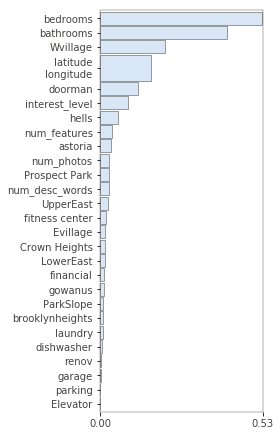

In [69]:
showimp(rf, X, y)

In [70]:
#6% improvement from the baseline model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
print(f"RF Training score {rf.score(X_train, y_train):.4f}")
print(f"RF Validation score {rf.score(X_test, y_test):.4f}")
# oob and validation score pretty similar

RF Training score 0.9812
RF Validation score 0.8735
